In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [ ]:
base_df_resampled = pd.read_csv("filtered_df.csv")

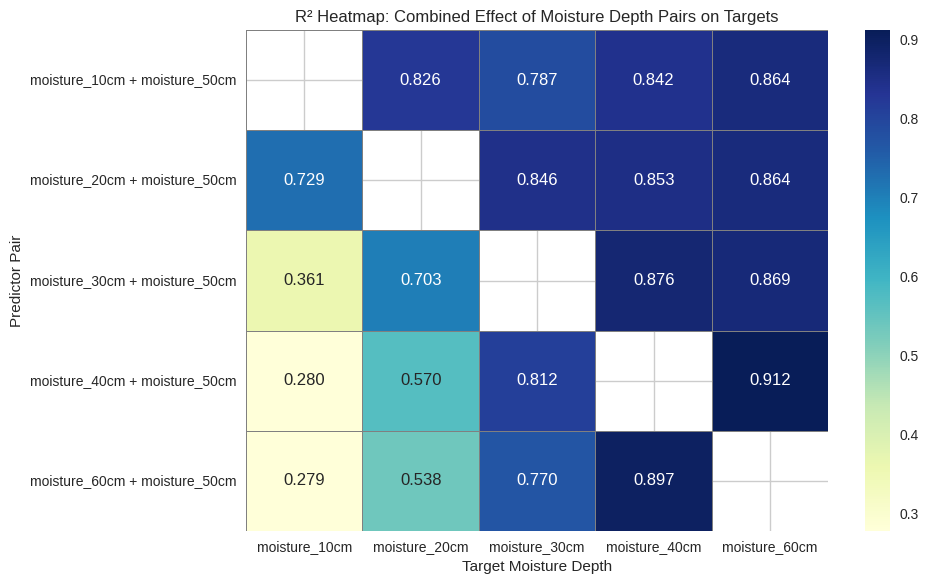

In [ ]:
# Define predictors and targets
pairs = [
    ("moisture_10cm", "moisture_50cm"),
    ("moisture_20cm", "moisture_50cm"),
    ("moisture_30cm", "moisture_50cm"),
    ("moisture_40cm", "moisture_50cm"),
    ("moisture_60cm", "moisture_50cm")
]
targets = ["moisture_10cm", "moisture_20cm", "moisture_30cm", "moisture_40cm","moisture_60cm"]

# Initialize matrix for heatmap
heatmap_data = pd.DataFrame(index=[f"{x1} + {x2}" for x1, x2 in pairs], columns=targets)

# Calculate R² for each pair on each target
for x1, x2 in pairs:
    for target in targets:
        if target not in (x1, x2):
            X = base_df_resampled[[x1, x2]].dropna()
            y = base_df_resampled.loc[X.index, target]
            model = LinearRegression().fit(X, y)
            r2 = r2_score(y, model.predict(X))
            heatmap_data.loc[f"{x1} + {x2}", target] = round(r2, 4)
        else:
            heatmap_data.loc[f"{x1} + {x2}", target] = None  # Ignore self-prediction

# Convert to float type for plotting
heatmap_data = heatmap_data.astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("R² Heatmap: Combined Effect of Moisture Depth Pairs on Targets")
plt.xlabel("Target Moisture Depth")
plt.ylabel("Predictor Pair")
plt.tight_layout()
plt.show()

In [ ]:
#Train-test split
train_base, test_base = train_test_split(base_df_resampled, test_size=0.2, random_state=123)
train_base.reset_index(drop=True, inplace=True)
test_base.reset_index(drop=True, inplace=True)

#Predicitng Moisture at 20cm

In [ ]:
features_to_exclude_20 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_20)
y_train_full_10 = train_base['moisture_20cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_20)
y_test_full_10 = test_base['moisture_20cm']


In [ ]:
rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9925697991792805
Test R2: 0.9879896502370751
Train RMSE: 0.0054334398811525
Test RMSE: 0.0069377999041815306



Feature importance - Random Forest moisture_10cm + moisture_50cm + meteorological features:
            Feature  Importance
0     moisture_10cm    0.778818
1     moisture_50cm    0.149397
2     temperature_c    0.034323
3  humidity_percent    0.015474
7   wind_speed_max2    0.005634
8         radiation    0.005003
6        wind_speed    0.004925
5          leaf_wet    0.003149
9               vpd    0.002878
4        amnt_precp    0.000401


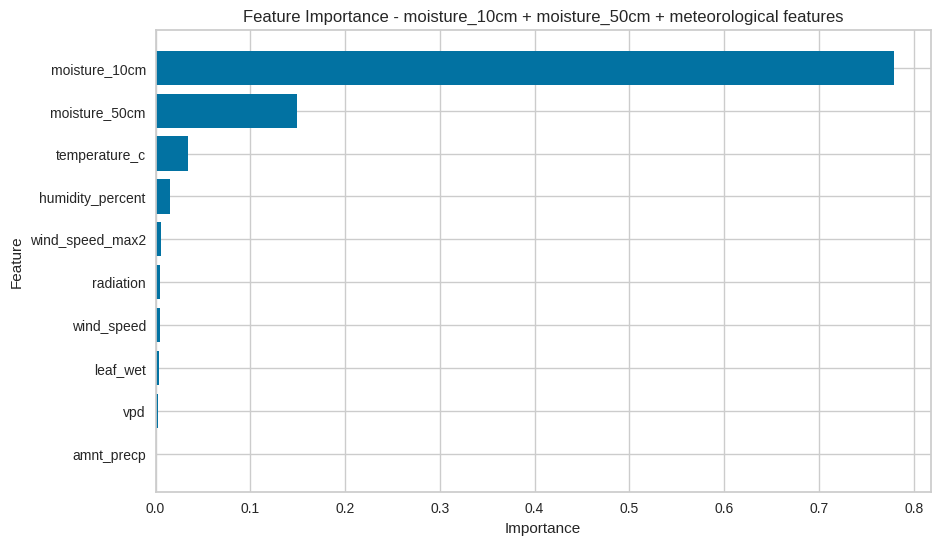

In [ ]:
print("\nFeature importance - Random Forest moisture_10cm + moisture_50cm + meteorological features:")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Predicitng moisture at 30cm depth

In [ ]:
features_to_exclude_30_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_30_from_10)
y_train_full_10 = train_base['moisture_30cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_30_from_10)
y_test_full_10 = test_base['moisture_30cm']


In [ ]:
rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9936871229573556
Test R2: 0.9907471444891073
Train RMSE: 0.0036855106277915895
Test RMSE: 0.0044943060775010655



Feature importance - moisture_10cm + moisture_50cm + meteorological features:
            Feature  Importance
1     moisture_50cm    0.831875
0     moisture_10cm    0.125693
2     temperature_c    0.019283
3  humidity_percent    0.009205
7   wind_speed_max2    0.003586
8         radiation    0.002708
6        wind_speed    0.002639
9               vpd    0.002440
5          leaf_wet    0.002021
4        amnt_precp    0.000551


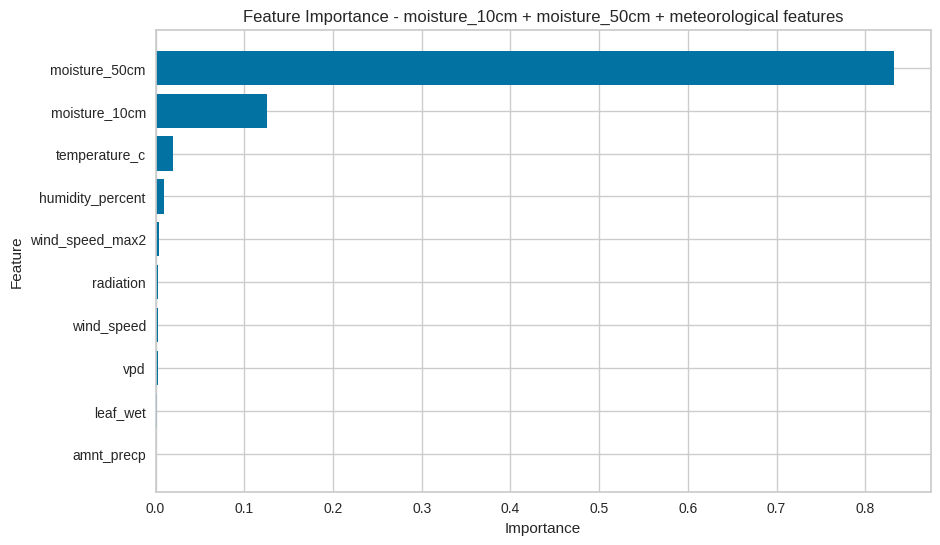

In [ ]:
print("\nFeature importance - moisture_10cm + moisture_50cm + meteorological features:")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Predicting moisture at 40cm depth

In [ ]:
features_to_exclude_40_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_40_from_10)
y_train_full_10 = train_base['moisture_40cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_40_from_10)
y_test_full_10 = test_base['moisture_40cm']

In [ ]:
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9944461536074413
Test R2: 0.9901079763728893
Train RMSE: 0.00255962279099931
Test RMSE: 0.0034460295572718825



Feature importance - moisture_10cm + moisture_50cm + meteorological features
            Feature  Importance
1     moisture_50cm    0.870907
0     moisture_10cm    0.070517
2     temperature_c    0.023273
6        wind_speed    0.011062
3  humidity_percent    0.007413
9               vpd    0.004390
5          leaf_wet    0.004336
7   wind_speed_max2    0.003911
8         radiation    0.003429
4        amnt_precp    0.000762


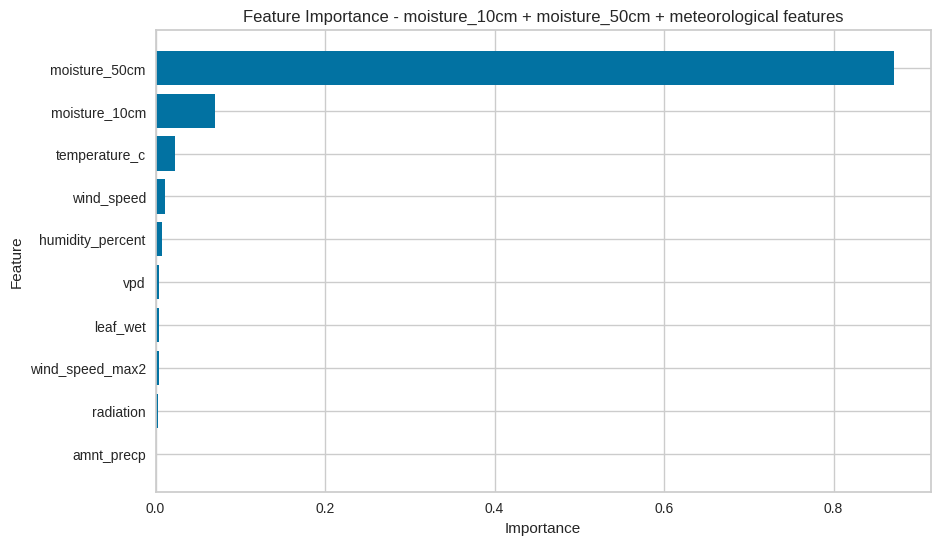

In [ ]:
print("\nFeature importance - moisture_10cm + moisture_50cm + meteorological features")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Predicting moisture at 60cm depth

In [ ]:
features_to_exclude_60_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_60_from_10)
y_train_full_10 = train_base['moisture_60cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_60_from_10)
y_test_full_10 = test_base['moisture_60cm']

In [ ]:
rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.994463456934787
Test R2: 0.9916507746365231
Train RMSE: 0.0009064771311539497
Test RMSE: 0.0011291786801653244



Feature importance - moisture_10cm + moisture_50cm + meteorological features
            Feature  Importance
1     moisture_50cm    0.911308
0     moisture_10cm    0.038801
2     temperature_c    0.029709
3  humidity_percent    0.007204
7   wind_speed_max2    0.003290
8         radiation    0.002432
6        wind_speed    0.002411
9               vpd    0.002119
5          leaf_wet    0.001910
4        amnt_precp    0.000816


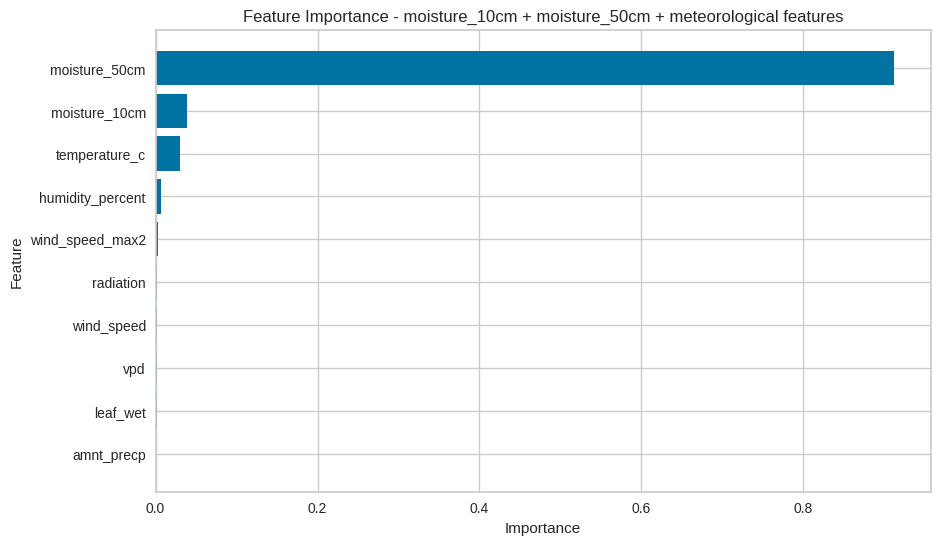

In [ ]:
print("\nFeature importance - moisture_10cm + moisture_50cm + meteorological features")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Adding Time variables

In [ ]:
df = base_df_resampled.copy()

In [ ]:
df['timestamp_device'] = pd.to_datetime(df['timestamp_device'])

In [ ]:
#Train-test split
train_base, test_base = train_test_split(df, test_size=0.2, random_state=123)
train_base.reset_index(drop=True, inplace=True)
test_base.reset_index(drop=True, inplace=True)

In [ ]:
def add_time_features(df):
    df = df.copy()
    df['timestamp_device'] = pd.to_datetime(df['timestamp_device'])
    df['hour'] = df['timestamp_device'].dt.hour
    df['dayofweek'] = df['timestamp_device'].dt.dayofweek
    df['month'] = df['timestamp_device'].dt.month
    df['dayofyear'] = df['timestamp_device'].dt.dayofyear
    return df

# Add time features
train_base = add_time_features(train_base)
test_base = add_time_features(test_base)


In [ ]:
train_base.head()

,timestamp_device,moisture_10cm,moisture_20cm,moisture_30cm,moisture_40cm,moisture_50cm,moisture_60cm,temperature_c,humidity_percent,amnt_precp,leaf_wet,wind_speed,wind_speed_max2,radiation,vpd,hour,dayofweek,month,dayofyear
0,2023-09-24 22:10:00,0.329,0.351,0.346,0.349,0.407,0.414,15.55,99.68,0.4,10.0,0.0,0.0,0.0,0.00,22,6,9,267
1,2023-01-19 17:10:00,0.353,0.436,0.443,0.440,0.434,0.434,4.17,99.84,0.0,0.0,1.7,3.7,0.0,0.00,17,3,1,19
2,2024-02-13 17:20:00,0.372,0.419,0.393,0.376,0.414,0.423,8.88,82.43,0.0,0.0,1.8,3.3,0.0,0.19,17,1,2,44
3,2024-10-09 12:30:00,0.268,0.368,0.431,0.398,0.419,0.425,25.71,53.76,0.0,0.0,0.0,0.5,497.0,1.52,12,2,10,283
4,2023-12-02 18:10:00,0.361,0.414,0.394,0.376,0.412,0.424,7.87,99.99,0.2,0.0,0.0,0.2,0.0,0.00,18,5,12,336


#Predicitng Moisture at 20 cm

In [ ]:
#Without Meterological variables:
#Predicitng moisture at 20cm depth from 50cm and 10cm depth
features_to_exclude_20 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device','temperature_c',	"humidity_percent",	"amnt_precp",	"leaf_wet",	"wind_speed",	"wind_speed_max2",	"radiation", 'vpd']
X_train_full_10 = train_base.drop(columns=features_to_exclude_20)
y_train_full_10 = train_base['moisture_20cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_20)
y_test_full_10 = test_base['moisture_20cm']

rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

In [ ]:
print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9990873187334124
Test R2: 0.9985282808373137
Train RMSE: 0.0019042946987524543
Test RMSE: 0.002428602372064704


In [ ]:
#with meterological variables
#Predicitng moisture at 20cm depth from 50cm and 10cm depth
features_to_exclude_20 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_20)
y_train_full_10 = train_base['moisture_20cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_20)
y_test_full_10 = test_base['moisture_20cm']

rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

In [ ]:


print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9925697991792805
Test R2: 0.9879896502370751
Train RMSE: 0.0054334398811525
Test RMSE: 0.0069377999041815306


#Prediciting Moisture at 30cm depth

In [ ]:
#Without meterological variables
features_to_exclude_30_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device','temperature_c',	"humidity_percent",	"amnt_precp",	"leaf_wet",	"wind_speed",	"wind_speed_max2",	"radiation", 'vpd']
X_train_full_10 = train_base.drop(columns=features_to_exclude_30_from_10)
y_train_full_10 = train_base['moisture_30cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_30_from_10)
y_test_full_10 = test_base['moisture_30cm']

rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)

In [ ]:

print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))



Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9992753505552519
Test R2: 0.9984839208862364
Train RMSE: 0.0012486708821964827
Test RMSE: 0.001819221953218341


In [ ]:
#with meterological variables
features_to_exclude_30_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_30_from_10)
y_train_full_10 = train_base['moisture_30cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_30_from_10)
y_test_full_10 = test_base['moisture_30cm']

rf_full_10cm = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10cm.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10cm = rf_full_10cm.predict(X_train_full_10)
y_test_pred_full_10cm = rf_full_10cm.predict(X_test_full_10)


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9992892890691971
Test R2: 0.9985899563234596
Train RMSE: 0.0012366035818638201
Test RMSE: 0.0017544501722817206

Feature importance - moisture_10cm + moisture_50cm + meteorological features:
             Feature  Importance
1      moisture_50cm    0.815286
0      moisture_10cm    0.113296
13         dayofyear    0.047462
12             month    0.010961
2      temperature_c    0.004668
11         dayofweek    0.003187
3   humidity_percent    0.001305
10              hour    0.001044
8          radiation    0.000573
6         wind_speed    0.000561
7    wind_speed_max2    0.000511
4         amnt_precp    0.000449
9                vpd    0.000385
5           leaf_wet    0.000309


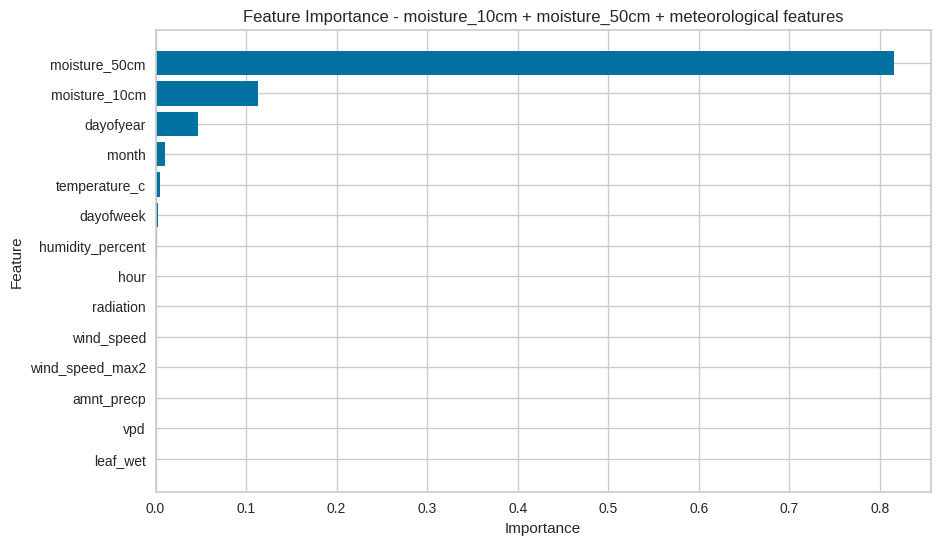

In [ ]:
print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10cm))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10cm))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10cm)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10cm)))

print("\nFeature importance - moisture_10cm + moisture_50cm + meteorological features:")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10cm.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Prediciting Moisture at 40cm depth

In [ ]:
#Without meteorlogical variables
features_to_exclude_40_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device','temperature_c',	"humidity_percent",	"amnt_precp",	"leaf_wet",	"wind_speed",	"wind_speed_max2",	"radiation", 'vpd']
X_train_full_10 = train_base.drop(columns=features_to_exclude_40_from_10)
y_train_full_10 = train_base['moisture_40cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_40_from_10)
y_test_full_10 = test_base['moisture_40cm']

rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

In [ ]:
print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9988517501311712
Test R2: 0.9979874120434051
Train RMSE: 0.0011638506105879729
Test RMSE: 0.0015543680487410353


In [ ]:
#With meteorlogical variables
features_to_exclude_40_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_40_from_10)
y_train_full_10 = train_base['moisture_40cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_40_from_10)
y_test_full_10 = test_base['moisture_40cm']

rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9990249262030029
Test R2: 0.9976947801116235
Train RMSE: 0.0010725011819268816
Test RMSE: 0.0016635375354037694

Feature importance - moisture_10cm + moisture_50cm + meteorological features
             Feature  Importance
1      moisture_50cm    0.861286
0      moisture_10cm    0.057465
13         dayofyear    0.053276
2      temperature_c    0.012372
12             month    0.003290
9                vpd    0.002755
11         dayofweek    0.002171
7    wind_speed_max2    0.001879
10              hour    0.001722
3   humidity_percent    0.001372
8          radiation    0.000721
6         wind_speed    0.000714
4         amnt_precp    0.000670
5           leaf_wet    0.000308


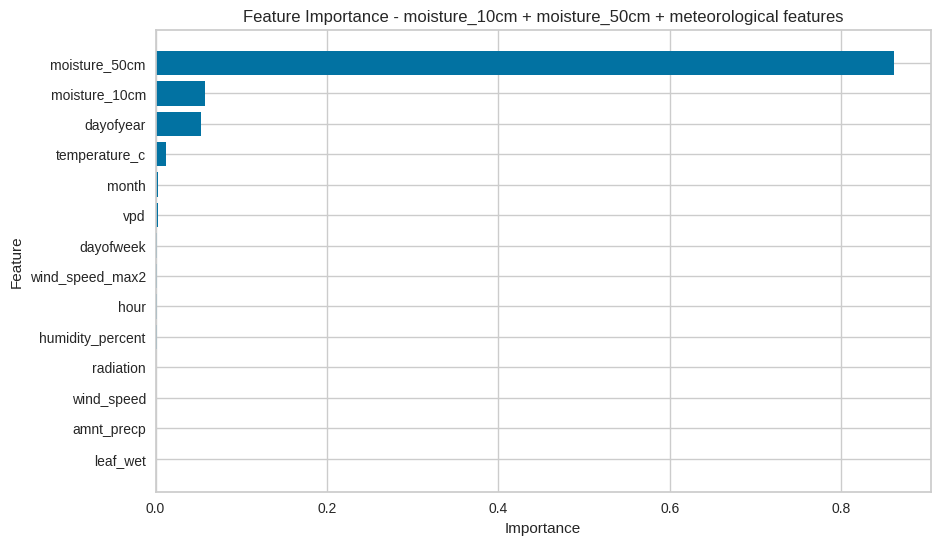

In [ ]:
print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))

print("\nFeature importance - moisture_10cm + moisture_50cm + meteorological features")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


#Prediciting Moisture at 60cm depth

In [ ]:
#wiohut meterological variables
features_to_exclude_60_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device','temperature_c',	"humidity_percent",	"amnt_precp",	"leaf_wet",	"wind_speed",	"wind_speed_max2",	"radiation", 'vpd']
X_train_full_10 = train_base.drop(columns=features_to_exclude_60_from_10)
y_train_full_10 = train_base['moisture_60cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_60_from_10)
y_test_full_10 = test_base['moisture_60cm']

rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)

In [ ]:
print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9987329399706611
Test R2: 0.9982238203160002
Train RMSE: 0.0004336467604343943
Test RMSE: 0.0005208144520924119


In [ ]:
features_to_exclude_60_from_10 = ['moisture_20cm', 'moisture_30cm', 'moisture_40cm', 'moisture_60cm', 'timestamp_device']
X_train_full_10 = train_base.drop(columns=features_to_exclude_60_from_10)
y_train_full_10 = train_base['moisture_60cm']
X_test_full_10 = test_base.drop(columns=features_to_exclude_60_from_10)
y_test_full_10 = test_base['moisture_60cm']

rf_full_10 = RandomForestRegressor(random_state=42, n_estimators=100, max_depth= 15)
rf_full_10.fit(X_train_full_10, y_train_full_10)
y_train_pred_full_10 = rf_full_10.predict(X_train_full_10)
y_test_pred_full_10 = rf_full_10.predict(X_test_full_10)


Random Forest - moisture_10cm + moisture_50cm + meteorological features
Train R2: 0.9985790038820596
Test R2: 0.9977854655229046
Train RMSE: 0.00045923391802406174
Test RMSE: 0.000581541618533315

Feature importance - moisture_10cm + moisture_50cm + meteorological features
             Feature  Importance
1      moisture_50cm    0.897117
13         dayofyear    0.050497
0      moisture_10cm    0.019702
2      temperature_c    0.019652
12             month    0.006852
11         dayofweek    0.002768
3   humidity_percent    0.000752
10              hour    0.000662
7    wind_speed_max2    0.000651
4         amnt_precp    0.000323
6         wind_speed    0.000291
8          radiation    0.000266
9                vpd    0.000249
5           leaf_wet    0.000218


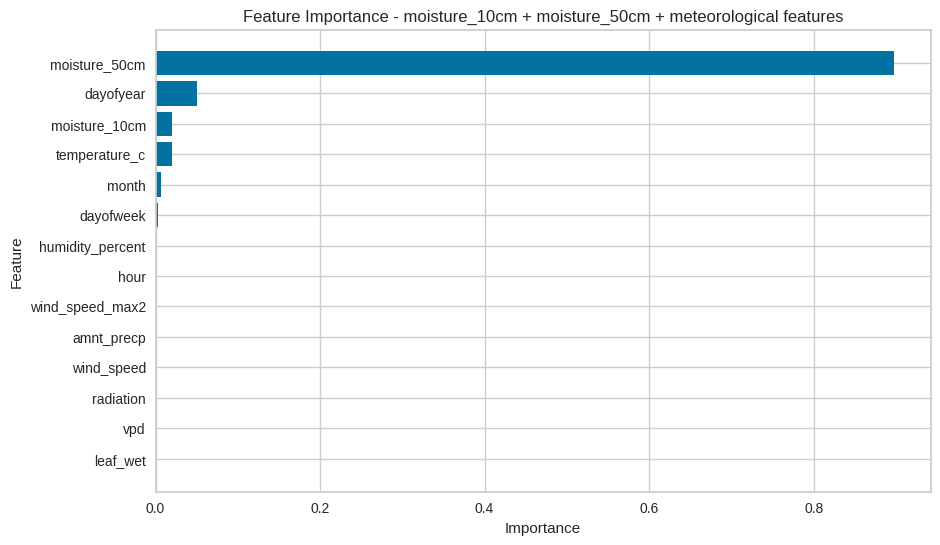

In [ ]:


print("\nRandom Forest - moisture_10cm + moisture_50cm + meteorological features")
print("Train R2:", r2_score(y_train_full_10, y_train_pred_full_10))
print("Test R2:", r2_score(y_test_full_10, y_test_pred_full_10))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_full_10, y_train_pred_full_10)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_full_10, y_test_pred_full_10)))

print("\nFeature importance - moisture_10cm + moisture_50cm + meteorological features")
feat_imp_rf = pd.DataFrame({
    'Feature': X_train_full_10.columns,
    'Importance': rf_full_10.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - moisture_10cm + moisture_50cm + meteorological features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

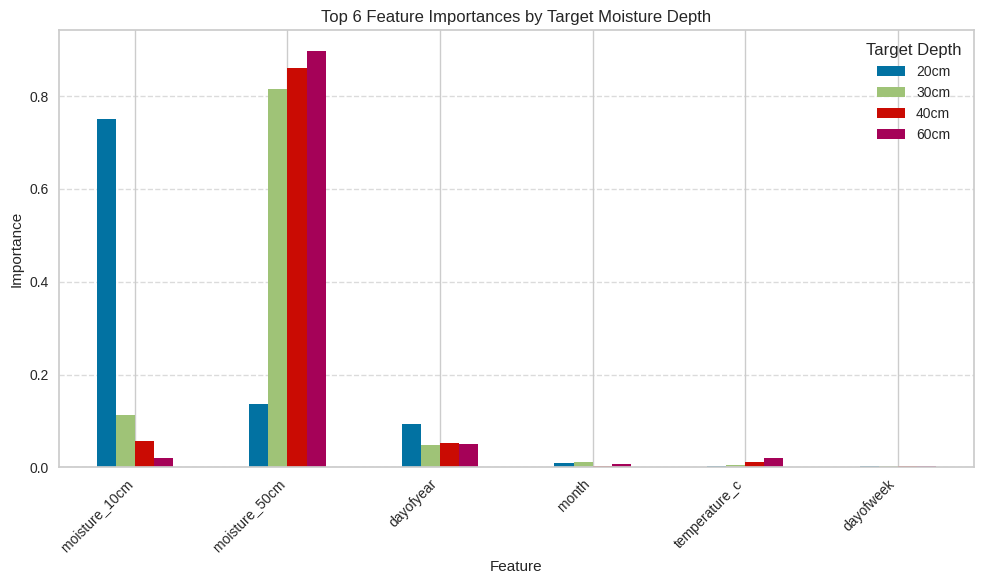

In [ ]:
# Top 6 features only
data_top6 = {
    "Feature": [
        "moisture_10cm", "moisture_50cm", "dayofyear",
        "month", "temperature_c", "dayofweek"
    ],
    "20cm": [0.750110, 0.135640, 0.093033, 0.008447, 0.003737, 0.003232],
    "30cm": [0.113296, 0.815286, 0.047462, 0.010961, 0.004668, 0.003187],
    "40cm": [0.057465, 0.861286, 0.053276, 0.003290, 0.012372, 0.002171],
    "60cm": [0.019702, 0.897117, 0.050497, 0.006852, 0.019652, 0.002768]
}

df_top6 = pd.DataFrame(data_top6)
df_top6.set_index("Feature", inplace=True)

# Plot
ax = df_top6.plot(kind='bar', figsize=(10, 6))
plt.title("Top 6 Feature Importances by Target Moisture Depth")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Target Depth")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

